<a href="https://colab.research.google.com/github/CubatLin/TBrain-E.SUN-AI-Open-Competition-Fall-2019-15th-place-Feature-Engineering/blob/master/Modeling%20-%20LGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#手動
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install category_encoders
#需要的套件
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import math
import matplotlib
import datetime
## scikit learn part
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN
from sklearn import preprocessing
from scipy.stats.mstats import winsorize
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SVMSMOTE
from imblearn.under_sampling import ClusterCentroids
from category_encoders.target_encoder import TargetEncoder
## scikit learn matrics
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb
## ml part
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import pandas as pd


     |████████████████████████████████| 81kB 5.6MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Load Data
total_set = pd.read_csv('/content/gdrive/MyDrive/Python/2019 E.Sun Autumn/total_set_1001.csv')

In [ ]:
train_set = total_set[total_set.if_train==1] #1521787
test_set = total_set[total_set.if_train==0] #421665
print(train_set.shape,'\n',test_set.shape,'\n')

(1521787, 72) 
 (421665, 72) 



In [ ]:
max(train_set['locdt'])

90

In [ ]:
max(test_set['locdt'])

120

In [ ]:
total_set=total_set.drop(['Unnamed: 0'],axis=1)
total_set.columns

Index(['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd',
       'flbmk', 'flg_3dsmk', 'fraud_ind', 'hcefg', 'if_train', 'insfg',
       'iterm', 'locdt', 'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn',
       'stscd', 'txkey', 'time_interval', 'if_mor', 'conam_log', 'conam_3rt',
       'mchno1', 'mchno2', 'mchno3', 'conam1', 'conam2', 'conam3', 'mcc1',
       'mcc2', 'mcc3', 'scity1', 'scity2', 'scity3', 'acqic1', 'acqic2',
       'acqic3', 'contp1', 'contp2', 'contp3', 'ovrlt1', 'ovrlt2', 'ovrlt3',
       'hcefg1', 'hcefg2', 'hcefg3', 'csmcu1', 'csmcu2', 'csmcu3', 'if_mor1',
       'if_mor2', 'if_mor3', 'conam_log1', 'conam_log2', 'conam_log3',
       'conam_3rt1', 'conam_3rt2', 'conam_3rt3', 'weekday', 'time_weight',
       'sum_lag0', 'sum_lag1', 'sum_lag2', 'diff_log10', 'mcc_mode'],
      dtype='object')

In [ ]:
#import customer group
train_cluster = pd.read_csv('/content/gdrive/My Drive/train_detail_classify_flag1019.csv')
test_cluster = pd.read_csv('/content/gdrive/My Drive/test_detail_classify_flag1019.csv')

print(train_cluster.columns)
print(train_cluster.shape)

print(test_cluster.columns)
print(test_cluster.shape)

Index(['Unnamed: 0', 'X', 'acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu',
       'ecfg', 'etymd', 'flbmk', 'flg_3dsmk', 'fraud_ind', 'hcefg', 'insfg',
       'iterm', 'locdt', 'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn',
       'stscd', 'txkey', 'MCC_Country', 'MCC_flag', 'ecfg_flag',
       'MCC_Country_flag', 'MCC_flag_NBR', 'ecfg_flag_NBR',
       'MCC_Country_flag_NBR', 'cluster_flag'],
      dtype='object')
(1521787, 33)
Index(['Unnamed: 0', 'X', 'acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu',
       'ecfg', 'etymd', 'flbmk', 'flg_3dsmk', 'hcefg', 'insfg', 'iterm',
       'locdt', 'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd',
       'txkey', 'MCC_Country', 'MCC_flag', 'ecfg_flag', 'MCC_Country_flag',
       'MCC_flag_NBR', 'ecfg_flag_NBR', 'MCC_Country_flag_NBR',
       'cluster_flag'],
      dtype='object')
(421665, 32)


In [ ]:
train_cluster = train_cluster[['txkey','MCC_flag', 'MCC_Country_flag', 'ecfg_flag','cluster_flag']]
test_cluster=test_cluster[['txkey','MCC_flag', 'MCC_Country_flag', 'ecfg_flag','cluster_flag']]
print(train_cluster.columns)
print(train_cluster.shape)

print(test_cluster.columns)
print(test_cluster.shape)

Index(['txkey', 'MCC_flag', 'MCC_Country_flag', 'ecfg_flag', 'cluster_flag'], dtype='object')
(1521787, 5)
Index(['txkey', 'MCC_flag', 'MCC_Country_flag', 'ecfg_flag', 'cluster_flag'], dtype='object')
(421665, 5)


# **LAG Feature**

In [ ]:
#join to total_set
total_cluster = pd.concat([train_cluster,test_cluster],axis=0)
total_set = pd.merge(total_set,total_cluster,on='txkey',how='left')

In [ ]:
print(total_set.columns)
print(total_set.groupby('if_train').size())
del total_cluster,train_cluster,test_cluster

Index(['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd',
       'flbmk', 'flg_3dsmk', 'fraud_ind', 'hcefg', 'if_train', 'insfg',
       'iterm', 'locdt', 'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn',
       'stscd', 'txkey', 'time_interval', 'if_mor', 'conam_log', 'conam_3rt',
       'mchno1', 'mchno2', 'mchno3', 'conam1', 'conam2', 'conam3', 'mcc1',
       'mcc2', 'mcc3', 'scity1', 'scity2', 'scity3', 'acqic1', 'acqic2',
       'acqic3', 'contp1', 'contp2', 'contp3', 'ovrlt1', 'ovrlt2', 'ovrlt3',
       'hcefg1', 'hcefg2', 'hcefg3', 'csmcu1', 'csmcu2', 'csmcu3', 'if_mor1',
       'if_mor2', 'if_mor3', 'conam_log1', 'conam_log2', 'conam_log3',
       'conam_3rt1', 'conam_3rt2', 'conam_3rt3', 'weekday', 'time_weight',
       'sum_lag0', 'sum_lag1', 'sum_lag2', 'diff_log10', 'mcc_mode',
       'MCC_flag', 'MCC_Country_flag', 'ecfg_flag', 'cluster_flag'],
      dtype='object')
if_train
0     421665
1    1521787
dtype: int64


In [ ]:
#Lag Feature

to_lag = ['mchno','conam', 'mcc', 'scity', 'acqic']
#Ethan 1001 add
to_lag.extend(['contp','ovrlt','hcefg','csmcu','if_mor','conam_log','conam_3rt'])

col = list(np.repeat(to_lag, 3))
number = list(range(1,4))*len(to_lag)

In [ ]:
lagged_cate = [(lambda x,y:  x + str(y))(x,y) for x,y in zip(col, number)]
print(lagged_cate)

['mchno1', 'mchno2', 'mchno3', 'conam1', 'conam2', 'conam3', 'mcc1', 'mcc2', 'mcc3', 'scity1', 'scity2', 'scity3', 'acqic1', 'acqic2', 'acqic3', 'contp1', 'contp2', 'contp3', 'ovrlt1', 'ovrlt2', 'ovrlt3', 'hcefg1', 'hcefg2', 'hcefg3', 'csmcu1', 'csmcu2', 'csmcu3', 'if_mor1', 'if_mor2', 'if_mor3', 'conam_log1', 'conam_log2', 'conam_log3', 'conam_3rt1', 'conam_3rt2', 'conam_3rt3']


In [ ]:
lagged_num = [k for k in lagged_cate if 'conam' in k]
print(lagged_num)

['conam1', 'conam2', 'conam3', 'conam_log1', 'conam_log2', 'conam_log3', 'conam_3rt1', 'conam_3rt2', 'conam_3rt3']


In [ ]:
lagged_cate = [k for k in lagged_cate if 'conam' not in k]
print(lagged_cate)

['mchno1', 'mchno2', 'mchno3', 'mcc1', 'mcc2', 'mcc3', 'scity1', 'scity2', 'scity3', 'acqic1', 'acqic2', 'acqic3', 'contp1', 'contp2', 'contp3', 'ovrlt1', 'ovrlt2', 'ovrlt3', 'hcefg1', 'hcefg2', 'hcefg3', 'csmcu1', 'csmcu2', 'csmcu3', 'if_mor1', 'if_mor2', 'if_mor3']


In [ ]:
## lag類別特徵轉字串
total_set[lagged_cate] = total_set[lagged_cate].astype(str)
## lag數值特徵na補0
total_set[lagged_num] = total_set[lagged_num].fillna(0)

In [ ]:
#(['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd',
#       'flbmk', 'flg_3dsmk', 'fraud_ind', 'hcefg', 'if_train', 'insfg',
#       'iterm', 'locdt', 'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn',
#       'stscd', 'txkey', 'time_interval', 'if_mor', 'conam_log', 'conam_3rt',
#       
#       'mchno1', 'mchno2', 'mchno3', 'conam1', 'conam2', 'conam3', 'mcc1',
#       'mcc2', 'mcc3','scity1', 'scity2', 'scity3', 'acqic1', 'acqic2',
#       'acqic3', 'contp1', 'contp2', 'contp3', 'ovrlt1', 'ovrlt2', 'ovrlt3',
#       'hcefg1', 'hcefg2', 'hcefg3', 'csmcu1', 'csmcu2', 'csmcu3', 'if_mor1',
#       'if_mor2', 'if_mor3', 'conam_log1', 'conam_log2', 'conam_log3',
#       'conam_3rt1', 'conam_3rt2', 'conam_3rt3', 
#      
#       'weekday', 'time_weight',
#       'sum_lag0', 'sum_lag1', 'sum_lag2', 'diff_log10', 'mcc_mode'])

feat_col = ['acqic','conam','contp','csmcu','ecfg', 'etymd',
            'flbmk','flg_3dsmk','hcefg','insfg', 'scity','stocn',
            'iterm','loctm','mcc','mchno','ovrlt', 
            'stscd','time_interval','if_mor','conam_log','conam_3rt']

feat_col.extend(lagged_cate)
feat_col.extend(lagged_num)
feat_col.extend(['weekday','time_weight'])#LKT
#left join part
feat_col.extend(['sum_lag0', 'sum_lag1', 'sum_lag2', 'diff_log10'])#pat
feat_col.extend(['MCC_flag', 'ecfg_flag', 'MCC_Country_flag'])
feat_col.extend(['cluster_flag'])#Shen
print(feat_col)

['acqic', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd', 'flbmk', 'flg_3dsmk', 'hcefg', 'insfg', 'scity', 'stocn', 'iterm', 'loctm', 'mcc', 'mchno', 'ovrlt', 'stscd', 'time_interval', 'if_mor', 'conam_log', 'conam_3rt', 'mchno1', 'mchno2', 'mchno3', 'mcc1', 'mcc2', 'mcc3', 'scity1', 'scity2', 'scity3', 'acqic1', 'acqic2', 'acqic3', 'contp1', 'contp2', 'contp3', 'ovrlt1', 'ovrlt2', 'ovrlt3', 'hcefg1', 'hcefg2', 'hcefg3', 'csmcu1', 'csmcu2', 'csmcu3', 'if_mor1', 'if_mor2', 'if_mor3', 'conam1', 'conam2', 'conam3', 'conam_log1', 'conam_log2', 'conam_log3', 'conam_3rt1', 'conam_3rt2', 'conam_3rt3', 'weekday', 'time_weight', 'sum_lag0', 'sum_lag1', 'sum_lag2', 'diff_log10', 'MCC_flag', 'ecfg_flag', 'MCC_Country_flag', 'cluster_flag']


In [ ]:
#(['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd',
#       'flbmk', 'flg_3dsmk', 'fraud_ind', 'hcefg', 'if_train', 'insfg',
#       'iterm', 'locdt', 'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn',
#       'stscd', 'txkey', 'time_interval', 'if_mor', 'conam_log', 'conam_3rt',
#       
#       'mchno1', 'mchno2', 'mchno3', 'conam1', 'conam2', 'conam3', 'mcc1',
#       'mcc2', 'mcc3','scity1', 'scity2', 'scity3', 'acqic1', 'acqic2',
#       'acqic3', 'contp1', 'contp2', 'contp3', 'ovrlt1', 'ovrlt2', 'ovrlt3',
#       'hcefg1', 'hcefg2', 'hcefg3', 'csmcu1', 'csmcu2', 'csmcu3', 'if_mor1',
#       'if_mor2', 'if_mor3', 'conam_log1', 'conam_log2', 'conam_log3',
#       'conam_3rt1', 'conam_3rt2', 'conam_3rt3', 
#      
#       'weekday', 'time_weight',
#       'sum_lag0', 'sum_lag1', 'sum_lag2', 'diff_log10', 'mcc_mode'])

to_target_col = ['acqic','contp', 'csmcu', 'etymd',
                 'hcefg',
                 'mcc','mchno','scity','stocn', 
                 'stscd','time_interval']
              
to_target_col.extend(lagged_cate)
to_target_col.extend(['weekday','time_weight'])
to_target_col.extend(['MCC_flag', 'ecfg_flag', 'MCC_Country_flag'])
print(to_target_col)

['acqic', 'contp', 'csmcu', 'etymd', 'hcefg', 'mcc', 'mchno', 'scity', 'stocn', 'stscd', 'time_interval', 'mchno1', 'mchno2', 'mchno3', 'mcc1', 'mcc2', 'mcc3', 'scity1', 'scity2', 'scity3', 'acqic1', 'acqic2', 'acqic3', 'contp1', 'contp2', 'contp3', 'ovrlt1', 'ovrlt2', 'ovrlt3', 'hcefg1', 'hcefg2', 'hcefg3', 'csmcu1', 'csmcu2', 'csmcu3', 'if_mor1', 'if_mor2', 'if_mor3', 'weekday', 'time_weight', 'MCC_flag', 'ecfg_flag', 'MCC_Country_flag']


In [ ]:
dummy_col = ['ecfg', 'insfg', 'ovrlt', 'flbmk', 'flg_3dsmk']
dummy_col.extend(['if_mor']) 

# Sampling

In [ ]:
train_set = total_set[total_set.if_train==1] #1521787
test_set = total_set[total_set.if_train==0] #421665
print(train_set.shape,'\n',test_set.shape,'\n')

(1521787, 75) 
 (421665, 75) 



In [ ]:
#有盜刷歷史註記 
f_tx = pd.read_csv('/content/gdrive/My Drive/f_tx.csv')

train_set_1HS = pd.merge(f_tx,train_set,on = 'txkey',how = 'left')
train_set_1HS.columns

#第一群:有盜刷紀錄的卡號中,有歷史註記的資料
train_set_1HS = train_set_1HS.sort_values(['cano','locdt','loctm']) #131425 數字是固定的

In [ ]:
print(train_set_1HS.shape)#(131425, 71)
print(train_set.shape) #(1521807, 71)
print(test_set.shape) #(421665, 72)

(131405, 75)
(1521787, 75)
(421665, 75)


In [ ]:
#無盜刷註記的
train_set_0 = train_set[~train_set['txkey'].isin(f_tx.values)] 
train_set_0 = train_set_0.sort_values(['cano','locdt','loctm']) 
print(train_set_0.shape)#1390382

(1390382, 75)


In [ ]:
train_set_0['smpl_ornot']=False
train_set_0['gp_cdf']=0
train_set_0 =train_set_0.reset_index(drop=True) 

#決定無盜刷紀錄卡號的majority中,同一張卡的交易紀錄哪個多
train_set_0.groupby('cano').size().quantile(.82)#大於19.0的

19.0

In [ ]:
tb = train_set_0.groupby('cano').size()#每一張cano中的樣本數
S=set()#S是存交易數量大於19的cano
for i in tb[tb.values>19].index:
    S.add(i)

train_set_cano=list(train_set_0['cano'])
train_set_ornot=list(train_set_0['smpl_ornot'])

for i in range(len(train_set_cano)):
    if train_set_cano[i] in S:
        train_set_ornot[i]=True

train_set_0['cano'] = train_set_cano
train_set_0['smpl_ornot'] = train_set_ornot

del train_set_cano ,train_set_ornot,tb

train_set_0_N = train_set_0.loc[train_set_0['smpl_ornot']==False]#第二群:無盜刷紀錄的卡號中,資料筆數小於19筆的,先不drop歷史紀錄
train_set_0_Y = train_set_0.loc[train_set_0['smpl_ornot']==True]

In [ ]:
##處理第三群:無盜刷紀錄的卡號中,資料筆數大於19筆的,drop歷史紀錄
#train_set_0_Y:交易比數大於19的 ->拿掉前幾筆的cdf
import collections
#

S_G_R = collections.deque()#計算每個cano子集合的樣本數
for i in train_set_0_Y.groupby('cano').size().values:
    S_G_R.append(i)

group_cdf = []
for i in S_G_R:
    time=0
    cnt = 1
    while time < i:
        group_cdf.append(cnt/i)
        cnt+=1
        time+=1

train_set_0_Y['gp_cdf']=group_cdf#得到每一個cano的累積cdf
train_set_0_Y_new = train_set_0_Y.loc[train_set_0_Y['gp_cdf']>0.3]#拿掉大於19筆的每個cano前30%資料

train_set_0 = pd.concat([train_set_0_N, train_set_0_Y_new], axis = 0)

del train_set_0_Y_new,train_set_0_Y,S_G_R,group_cdf,time,i,train_set_0_N

#-----------------------------------------------------------#
train_set_0= train_set_0.drop(['smpl_ornot', 'gp_cdf'],axis=1)

train_set_0.columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index(['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd',
       'flbmk', 'flg_3dsmk', 'fraud_ind', 'hcefg', 'if_train', 'insfg',
       'iterm', 'locdt', 'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn',
       'stscd', 'txkey', 'time_interval', 'if_mor', 'conam_log', 'conam_3rt',
       'mchno1', 'mchno2', 'mchno3', 'conam1', 'conam2', 'conam3', 'mcc1',
       'mcc2', 'mcc3', 'scity1', 'scity2', 'scity3', 'acqic1', 'acqic2',
       'acqic3', 'contp1', 'contp2', 'contp3', 'ovrlt1', 'ovrlt2', 'ovrlt3',
       'hcefg1', 'hcefg2', 'hcefg3', 'csmcu1', 'csmcu2', 'csmcu3', 'if_mor1',
       'if_mor2', 'if_mor3', 'conam_log1', 'conam_log2', 'conam_log3',
       'conam_3rt1', 'conam_3rt2', 'conam_3rt3', 'weekday', 'time_weight',
       'sum_lag0', 'sum_lag1', 'sum_lag2', 'diff_log10', 'mcc_mode',
       'MCC_flag', 'MCC_Country_flag', 'ecfg_flag', 'cluster_flag'],
      dtype='object')

In [ ]:
k_col=['conam','diff_log10','sum_lag0','conam1','sum_lag1','sum_lag2','conam2']
from sklearn.cluster import KMeans

train_set_0_k = train_set_0[k_col]
train_set_0_k =round(train_set_0_k, 3)

train_set_0_k.isnull().any(axis=0) 

train_set_0_k['diff_log10'] = train_set_0_k['diff_log10'].fillna(0)

train_set_0_karray = train_set_0_k.values

#K = 5 
clf = KMeans(n_clusters=5)
clf.fit(train_set_0_karray)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
unique, counts = np.unique(clf.labels_, return_counts=True)
dict(zip(unique, counts))
# 兩大三小 :{0: 359964, 1: 72245, 2: 190939, 3: 477630, 4: 72756}

{0: 474871, 1: 72242, 2: 188933, 3: 73968, 4: 363520}

In [ ]:
#---------------------------------------------------#
train_set_0['group'] = clf.labels_

#undersampling two huge part 
train_set_0_subh1 = train_set_0[train_set_0['group']==0]#359964
train_set_0_subh2 = train_set_0[train_set_0['group']==4]#477630

#not undersampling
train_set_0_subl1 = train_set_0[train_set_0['group']==1]#72245
train_set_0_subl2 = train_set_0[train_set_0['group']==2]#190939
train_set_0_subl3 = train_set_0[train_set_0['group']==3]#72756

train_set_0_subh1_1 = train_set_0_subh1.sample(frac =.8) 
train_set_0_subh2_1 = train_set_0_subh2.sample(frac =.8) 

train_set_0 = pd.concat([train_set_0_subh1_1, train_set_0_subh2_1,train_set_0_subl1,train_set_0_subl2,train_set_0_subl3], axis = 0)

train_set_0 = train_set_0.drop(['group'],axis=1)


In [ ]:
#
total_set = pd.concat([train_set_1HS,train_set_0,test_set],axis=0,sort=False)
#train_set_1HS:第一群:有盜刷紀錄的卡號中,有歷史註記的資料
#

del cnt,counts,k_col,train_set_0,train_set_0_k,train_set_0_karray,train_set_0_subh1,train_set_0_subh2,train_set_0_subl1,train_set_0_subl2,train_set_0_subl3,
train_set_0_subh1_1,train_set_0_subh2_1,train_set_1HS,unique

(         acqic   bacno    cano  ...  ecfg_flag  cluster_flag  group
 529328    6215   41627   85608  ...          N            23      0
 1160670   6189    8513  178688  ...          N            23      0
 590373    5975   66224   94737  ...          N            23      0
 826222    6882  104245  129312  ...          N             3      0
 776986    6883  104390  121031  ...          N            14      0
 483063    6881  102669   79108  ...          N            14      0
 421749    6716  156107   69070  ...          N            23      0
 1253517   6839   79556  192548  ...          E            20      0
 971003    6215   99843  151290  ...          Y            15      0
 404045    6769  134085   66086  ...          N            21      0
 855197    6189  117596  133804  ...          N             5      0
 318860       0  157834   52150  ...          N             3      0
 70021     6881   40325   11070  ...          N            23      0
 889885    6777   38766  138853  .

In [ ]:
print('total_set_shape:',total_set.shape,'\n',
      'total_set_columns:',total_set.columns,'\n',
      'train_test_obs:',total_set.groupby('if_train').size())
#Double check test data 筆數沒有被drop掉

total_set_shape: (1558926, 75) 
 total_set_columns: Index(['txkey', 'acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg',
       'etymd', 'flbmk', 'flg_3dsmk', 'fraud_ind', 'hcefg', 'if_train',
       'insfg', 'iterm', 'locdt', 'loctm', 'mcc', 'mchno', 'ovrlt', 'scity',
       'stocn', 'stscd', 'time_interval', 'if_mor', 'conam_log', 'conam_3rt',
       'mchno1', 'mchno2', 'mchno3', 'conam1', 'conam2', 'conam3', 'mcc1',
       'mcc2', 'mcc3', 'scity1', 'scity2', 'scity3', 'acqic1', 'acqic2',
       'acqic3', 'contp1', 'contp2', 'contp3', 'ovrlt1', 'ovrlt2', 'ovrlt3',
       'hcefg1', 'hcefg2', 'hcefg3', 'csmcu1', 'csmcu2', 'csmcu3', 'if_mor1',
       'if_mor2', 'if_mor3', 'conam_log1', 'conam_log2', 'conam_log3',
       'conam_3rt1', 'conam_3rt2', 'conam_3rt3', 'weekday', 'time_weight',
       'sum_lag0', 'sum_lag1', 'sum_lag2', 'diff_log10', 'mcc_mode',
       'MCC_flag', 'MCC_Country_flag', 'ecfg_flag', 'cluster_flag'],
      dtype='object') 
 train_test_obs: if_train
0     42

# **CV**

In [ ]:
total_set['cluster_flag'] = total_set['cluster_flag'].astype(str)

train_set = total_set[total_set.if_train==1] #1521787
test_set = total_set[total_set.if_train==0] #421665
print(train_set.shape,'\n',test_set.shape,'\n')

(1137261, 75) 
 (421665, 75) 



In [ ]:
train_X = train_set[feat_col]
train_y = train_set['fraud_ind']

test_X = test_set[feat_col]
test_key = test_set['txkey']

In [ ]:
cv_index = StratifiedKFold(n_splits=8, random_state=66).split(X = train_X, y = train_y)
cv_index = list(cv_index)

In [ ]:
i=6

cv_train_X = train_X.iloc[cv_index[i][0], :]
cv_train_Y = train_y.iloc[cv_index[i][0]]

cv_test_X = train_X.iloc[cv_index[i][1], :]
cv_test_Y = train_y.iloc[cv_index[i][1]]

print('Sampling CV', i)


Sampling CV 6


In [ ]:
# colname存起來備用
colname = cv_train_X.columns
print(colname)

Index(['acqic', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd', 'flbmk',
       'flg_3dsmk', 'hcefg', 'insfg', 'scity', 'stocn', 'iterm', 'loctm',
       'mcc', 'mchno', 'ovrlt', 'stscd', 'time_interval', 'if_mor',
       'conam_log', 'conam_3rt', 'mchno1', 'mchno2', 'mchno3', 'mcc1', 'mcc2',
       'mcc3', 'scity1', 'scity2', 'scity3', 'acqic1', 'acqic2', 'acqic3',
       'contp1', 'contp2', 'contp3', 'ovrlt1', 'ovrlt2', 'ovrlt3', 'hcefg1',
       'hcefg2', 'hcefg3', 'csmcu1', 'csmcu2', 'csmcu3', 'if_mor1', 'if_mor2',
       'if_mor3', 'conam1', 'conam2', 'conam3', 'conam_log1', 'conam_log2',
       'conam_log3', 'conam_3rt1', 'conam_3rt2', 'conam_3rt3', 'weekday',
       'time_weight', 'sum_lag0', 'sum_lag1', 'sum_lag2', 'diff_log10',
       'MCC_flag', 'ecfg_flag', 'MCC_Country_flag', 'cluster_flag'],
      dtype='object')


In [ ]:
from category_encoders.target_encoder import TargetEncoder
enc = TargetEncoder(cols = to_target_col + dummy_col,return_df=True, min_samples_leaf=150, smoothing=0.5).fit(cv_train_X, cv_train_Y)

In [ ]:
## encoder做完進行encoding轉換
cv_train_X = enc.transform(cv_train_X)

In [ ]:
#交互項
cv_train_X['new_conam_mchno'] = cv_train_X['conam']*cv_train_X['mchno']
cv_train_X['new_conam1_mchno'] = cv_train_X['conam1']*cv_train_X['mchno']
cv_train_X['new_sumlag0_mchno'] = cv_train_X['sum_lag0']*cv_train_X['mchno']
cv_train_X['new_diff_log10_mchno'] = cv_train_X['diff_log10']*cv_train_X['mchno']

cv_train_X['new_diff_log10_stscd'] = cv_train_X['diff_log10']*cv_train_X['stscd']
cv_train_X['new_diff_log10_ovrlt'] = cv_train_X['diff_log10']*cv_train_X['ovrlt']
cv_train_X['new_diff_log10_mcc'] = cv_train_X['diff_log10']*cv_train_X['mcc']

cv_train_X['new_conam1_mcc'] = cv_train_X['conam1']*cv_train_X['mcc']


# 用target encoding物件轉換CV test

In [ ]:
cv_test_X = enc.transform(cv_test_X)
cv_test_X[['conam', 'iterm']] = cv_test_X[['conam', 'iterm']].astype('float')

In [ ]:
cv_test_X['new_conam_mchno'] = cv_test_X['conam']*cv_test_X['mchno']
cv_test_X['new_conam1_mchno'] = cv_test_X['conam1']*cv_test_X['mchno']
cv_test_X['new_sumlag0_mchno'] = cv_test_X['sum_lag0']*cv_test_X['mchno']
cv_test_X['new_diff_log10_mchno'] = cv_test_X['diff_log10']*cv_test_X['mchno']

cv_test_X['new_diff_log10_stscd'] = cv_test_X['diff_log10']*cv_test_X['stscd']
cv_test_X['new_diff_log10_ovrlt'] = cv_test_X['diff_log10']*cv_test_X['ovrlt']
cv_test_X['new_diff_log10_mcc'] = cv_test_X['diff_log10']*cv_test_X['mcc']

cv_test_X['new_conam1_mcc'] = cv_test_X['conam1']*cv_test_X['mcc']


# Fit

In [ ]:
#lgb_train = lgb.Dataset(resampled_X, resampled_Y)
lgb_train = lgb.Dataset(cv_train_X, cv_train_Y)

In [ ]:
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt', 
    'objective': 'binary', #目標:二元形式
#    'device_type':'gpu', 
    'metric': {'binary_logloss'}, #log_loss
    'scale_pos_weight':1.5, #樣本是1在obj loss的加權
    'num_leaves': 38, #單顆樹最多不超過幾片葉子
    'learning_rate': 0.01, #eta
    'feature_fraction': 0.6, #做分裂的feature比例至少占多少才能用
    'bagging_fraction': 0.6, #裝60%
    'bagging_freq': 10, #10輪做一次bagging
    'max_depth' :6, #一棵樹的最大深度
    'lambda_l1' : 3, #節點數量懲罰度
    'lambda_l2' : 1, #節點預測值逞罰度
    'min_gain_to_split' : 0.0005, #gain下降多少才可以分裂
    'verbose': 0
}

# CV決定好的迭代次數

In [ ]:
cc = lgb.cv(params,
            lgb_train,
            num_boost_round=6000,
            nfold = 6,
            stratified = True,
            early_stopping_rounds = 30,
            verbose_eval = 100
           )

ValueError: ignored

In [ ]:
gbm = lgb.train(params,
            lgb_train,
            num_boost_round=len(cc['binary_logloss-mean']))

In [ ]:
print('Saving model...')
gbm.save_model('model_v1.txt')

In [ ]:
y_pred_prob = gbm.predict(cv_test_X)

In [ ]:
threshold=0.97
y_pred = np.where(y_pred_prob>threshold, 1, 0)

In [ ]:
pre = metrics.precision_score(cv_test_Y, y_pred)
re = metrics.recall_score(cv_test_Y, y_pred)
f1 = metrics.f1_score(cv_test_Y, y_pred)
print('pre:',pre,'\n' 
      're:',re,'\n' 
      'f1:', f1)

pre: 0.9739776951672863 
re: 0.1029874213836478 
f1: 0.186277995023107


# 特徵重要度

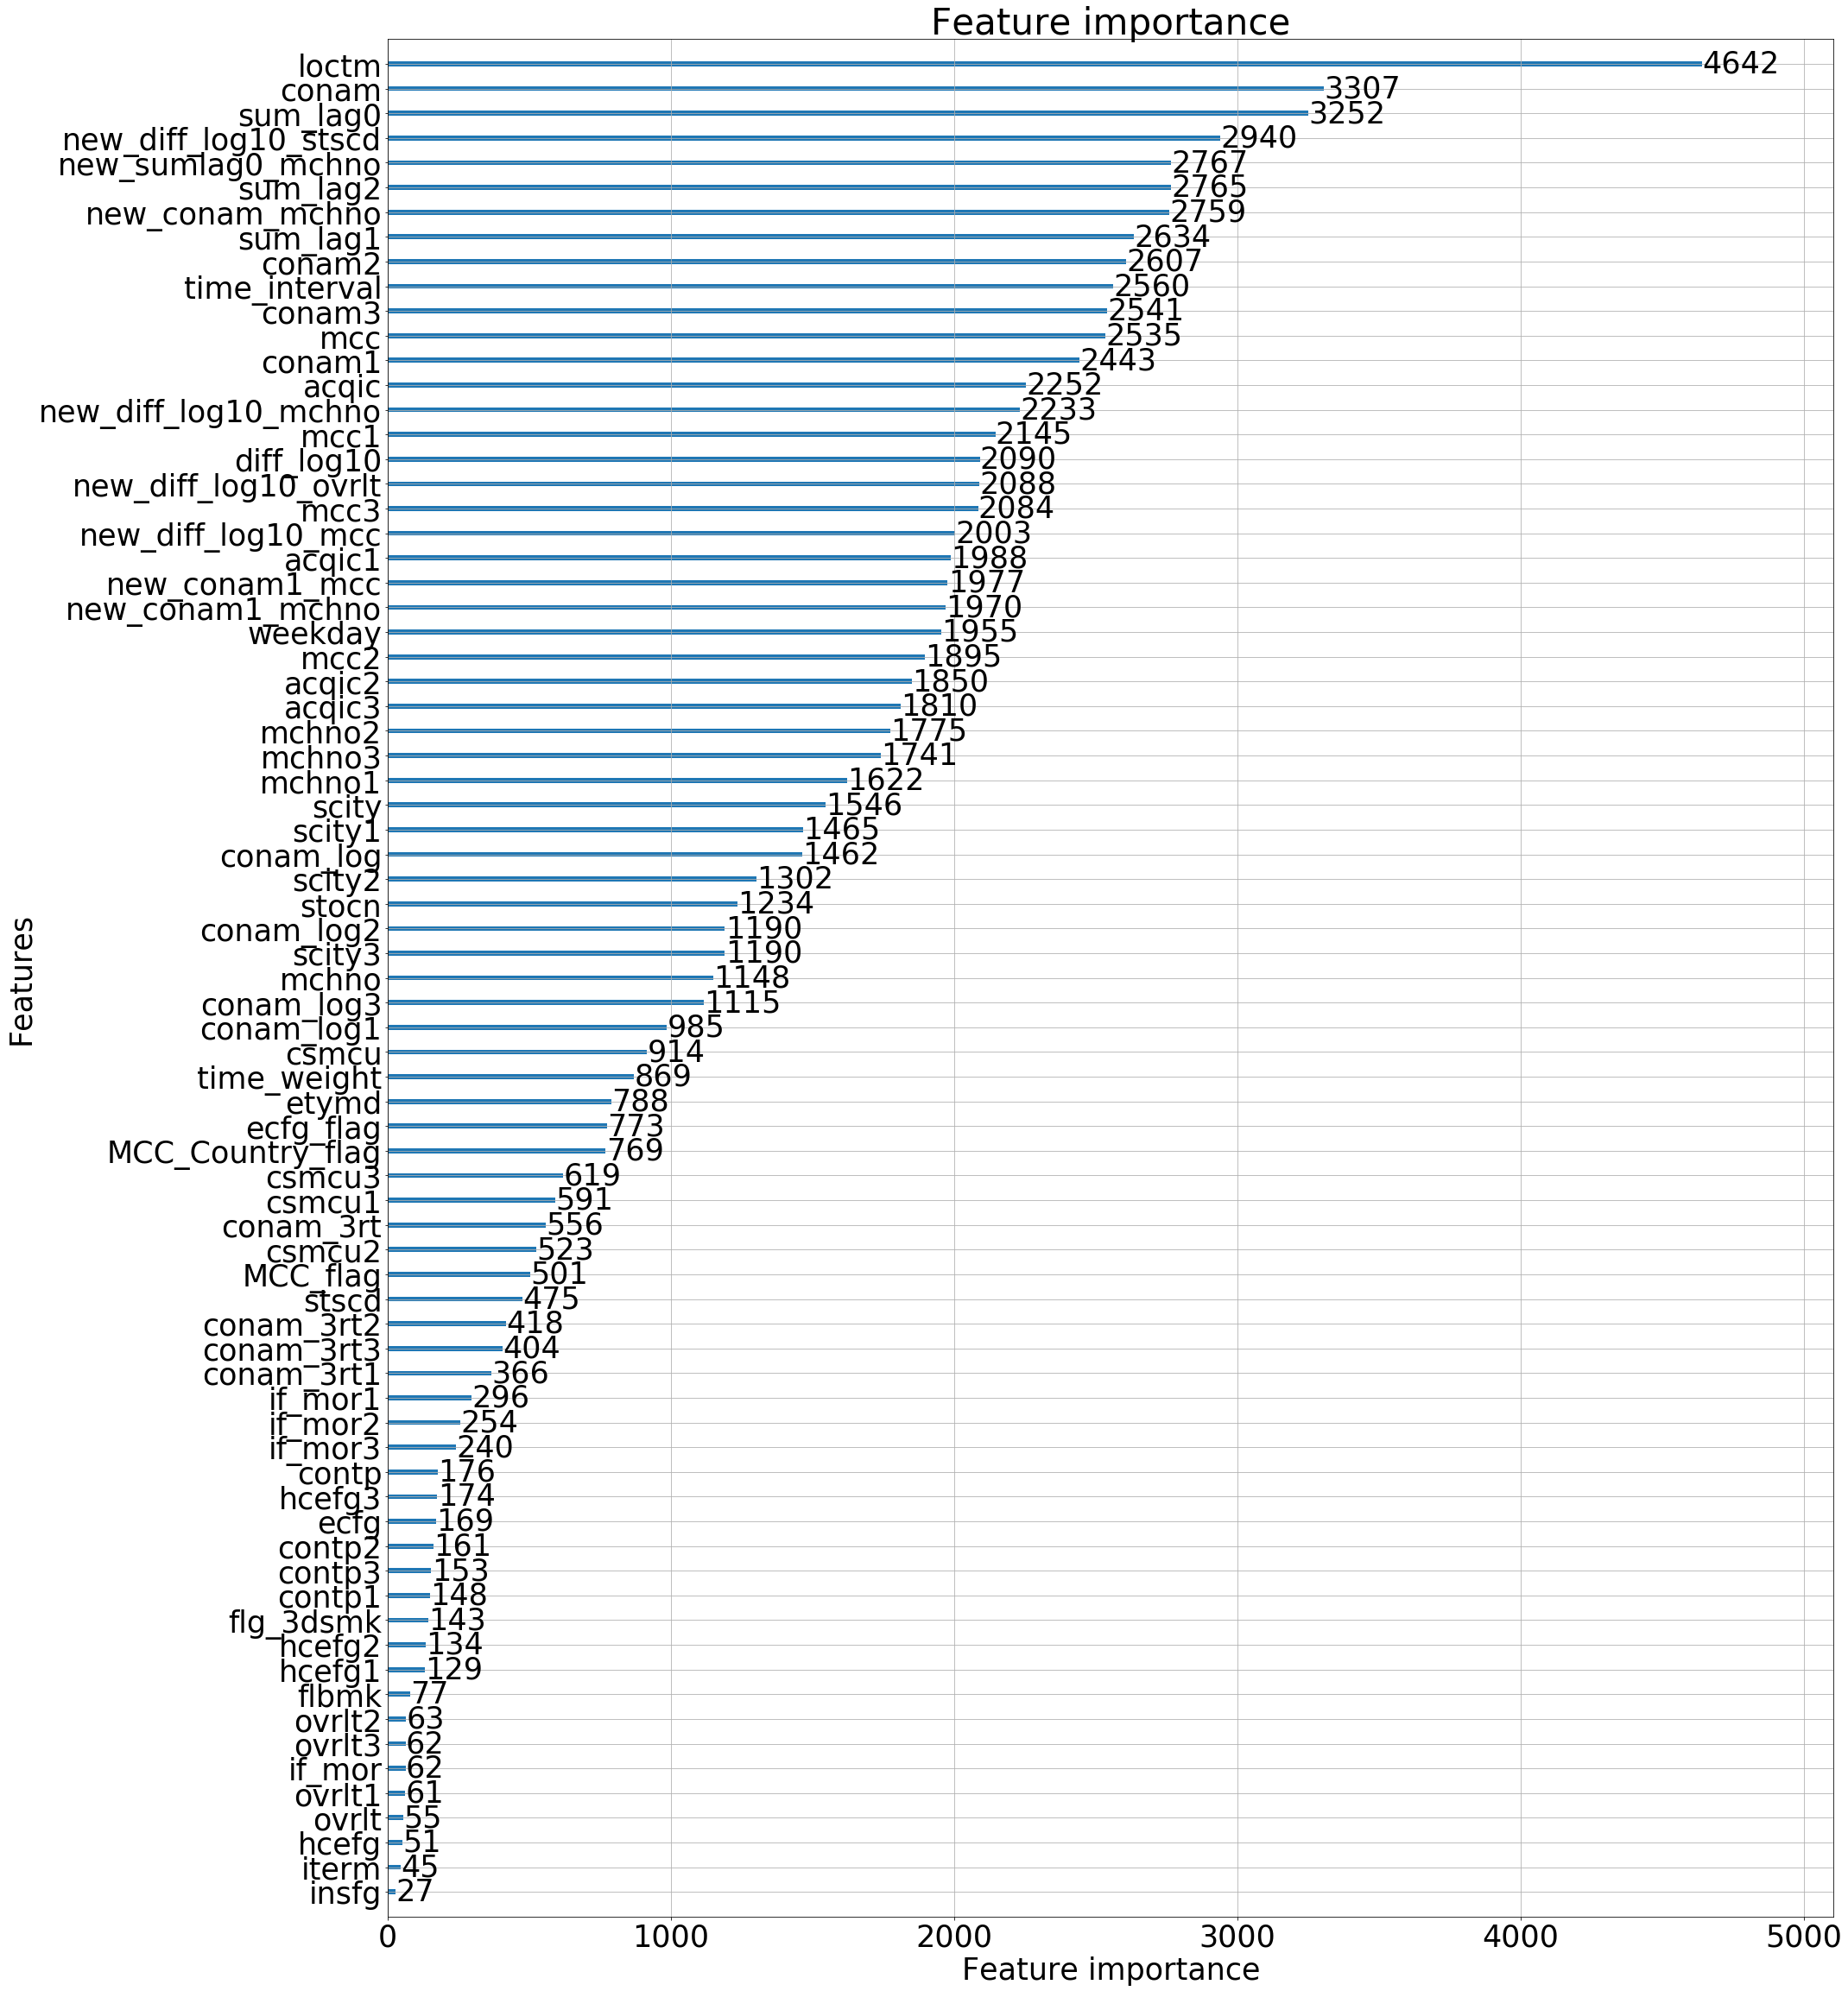

In [ ]:
matplotlib.rcParams.update({'font.size': 35})
ax = lgb.plot_importance(gbm)
fig = ax.figure
fig.set_size_inches(30, 40)


# Pre-re curve 並算 auc

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot

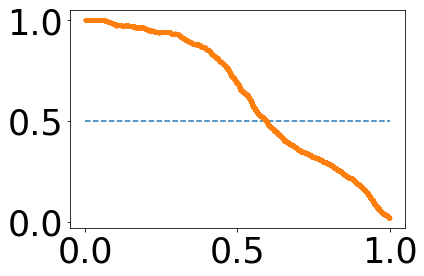

In [ ]:
precision, recall, thresholds = precision_recall_curve(cv_test_Y, y_pred_prob)

# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

In [ ]:
AUC = auc(recall, precision)
print(AUC)

0.6235705790979392


# TEST實際測試

In [ ]:
done_test = test_X

In [ ]:
done_test = enc.transform(done_test)
done_test[['conam', 'iterm']] = done_test[['conam', 'iterm']].astype('float')
done_test['new_conam_mchno'] = done_test['conam_log']*done_test['mchno']

done_test['new_conamlog_mchno'] = done_test['conam_log']*done_test['mchno']
done_test['new_conam1_mchno'] = done_test['conam1']*done_test['mchno']
done_test['new_sumlag0_mchno'] = done_test['sum_lag0']*done_test['mchno']
done_test['new_diff_log10_mchno'] = done_test['diff_log10']*done_test['mchno']

done_test['new_diff_log10_stscd'] = done_test['diff_log10']*done_test['stscd']
done_test['new_diff_log10_ovrlt'] = done_test['diff_log10']*done_test['ovrlt']
done_test['new_diff_log10_mcc'] = done_test['diff_log10']*done_test['mcc']

done_test['new_conam1_mcc'] = done_test['conam1']*done_test['mcc']

In [ ]:
submit_Y = gbm.predict(done_test)
threshold=0.97
submit_Y = np.where(submit_Y>threshold, 1, 0)

In [ ]:
np.mean(submit_Y)

0.00103399618180309

In [ ]:
submit_Y = pd.DataFrame({'txkey':test_key, 'fraud_ind':submit_Y})

In [ ]:
submit_Y.shape

(421665, 2)

In [ ]:
print(submit_Y.columns)
print(submit_Y.groupby('fraud_ind').size())

Index(['txkey', 'fraud_ind'], dtype='object')
fraud_ind
0    421229
1       436
dtype: int64


In [ ]:
#存在google drive root層
from google.colab import drive
drive.mount('drive')
submit_Y.to_csv('submit_1018.csv')
!cp submit_1018.csv drive/My\ Drive/

Mounted at drive
